In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [29]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-1, 1),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

In [46]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 30
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 726us/step - loss: 0.7153 - acc: 0.3824 - val_loss: 0.7084 - val_acc: 0.4211
Epoch 2/1000
455/455 [==============================] - 0s 93us/step - loss: 0.7005 - acc: 0.4308 - val_loss: 0.6924 - val_acc: 0.4211
Epoch 3/1000
455/455 [==============================] - 0s 90us/step - loss: 0.6862 - acc: 0.4308 - val_loss: 0.6787 - val_acc: 0.4211
Epoch 4/1000
455/455 [==============================] - 0s 80us/step - loss: 0.6734 - acc: 0.4308 - val_loss: 0.6666 - val_acc: 0.4386
Epoch 5/1000
455/455 [==============================] - 0s 87us/step - loss: 0.6624 - acc: 0.4901 - val_loss: 0.6558 - val_acc: 0.8684
Epoch 6/1000
455/455 [==============================] - 0s 92us/step - loss: 0.6506 - acc: 0.8330 - val_loss: 0.6453 - val_acc: 0.8684
Epoch 7/1000
455/455 [==============================] - 0s 81us/step - loss: 0.6396 - acc: 0.8505 - val_loss: 0.6337 - val_acc: 0.8860
Epoch 8/

Epoch 61/1000
455/455 [==============================] - 0s 86us/step - loss: 0.4533 - acc: 0.9121 - val_loss: 0.4555 - val_acc: 0.9035
Epoch 62/1000
455/455 [==============================] - 0s 77us/step - loss: 0.4494 - acc: 0.9055 - val_loss: 0.4505 - val_acc: 0.9211
Epoch 63/1000
455/455 [==============================] - 0s 70us/step - loss: 0.4493 - acc: 0.9033 - val_loss: 0.4533 - val_acc: 0.8947
Epoch 64/1000
455/455 [==============================] - 0s 72us/step - loss: 0.4470 - acc: 0.9077 - val_loss: 0.4507 - val_acc: 0.9035
Epoch 65/1000
455/455 [==============================] - 0s 71us/step - loss: 0.4456 - acc: 0.9077 - val_loss: 0.4483 - val_acc: 0.9123
Epoch 66/1000
455/455 [==============================] - 0s 94us/step - loss: 0.4450 - acc: 0.9055 - val_loss: 0.4479 - val_acc: 0.9123
Epoch 67/1000
455/455 [==============================] - 0s 105us/step - loss: 0.4429 - acc: 0.9077 - val_loss: 0.4505 - val_acc: 0.9123
Epoch 68/1000
455/455 [========================

455/455 [==============================] - 0s 81us/step - loss: 0.3917 - acc: 0.9099 - val_loss: 0.4019 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 73us/step - loss: 0.3930 - acc: 0.9055 - val_loss: 0.4049 - val_acc: 0.9035
Epoch 123/1000
455/455 [==============================] - 0s 72us/step - loss: 0.3890 - acc: 0.9143 - val_loss: 0.4017 - val_acc: 0.9035
Epoch 124/1000
455/455 [==============================] - 0s 67us/step - loss: 0.3868 - acc: 0.9121 - val_loss: 0.4006 - val_acc: 0.9123
Epoch 125/1000
455/455 [==============================] - 0s 62us/step - loss: 0.3863 - acc: 0.9143 - val_loss: 0.4004 - val_acc: 0.9123
Epoch 126/1000
455/455 [==============================] - 0s 59us/step - loss: 0.3860 - acc: 0.9121 - val_loss: 0.4008 - val_acc: 0.9035
Epoch 127/1000
455/455 [==============================] - 0s 56us/step - loss: 0.3857 - acc: 0.9165 - val_loss: 0.4000 - val_acc: 0.9123
Epoch 128/1000
455/455 [==============================] 

Epoch 181/1000
455/455 [==============================] - 0s 109us/step - loss: 0.3528 - acc: 0.9077 - val_loss: 0.3678 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 93us/step - loss: 0.3511 - acc: 0.9143 - val_loss: 0.3690 - val_acc: 0.9035
Epoch 183/1000
455/455 [==============================] - 0s 99us/step - loss: 0.3502 - acc: 0.9121 - val_loss: 0.3652 - val_acc: 0.9123
Epoch 184/1000
455/455 [==============================] - 0s 88us/step - loss: 0.3536 - acc: 0.9143 - val_loss: 0.3686 - val_acc: 0.9035
Epoch 185/1000
455/455 [==============================] - 0s 53us/step - loss: 0.3490 - acc: 0.9187 - val_loss: 0.3719 - val_acc: 0.9035
Epoch 186/1000
455/455 [==============================] - 0s 52us/step - loss: 0.3480 - acc: 0.9143 - val_loss: 0.3701 - val_acc: 0.9035
Epoch 187/1000
455/455 [==============================] - 0s 72us/step - loss: 0.3528 - acc: 0.9143 - val_loss: 0.3680 - val_acc: 0.9035
Epoch 188/1000
455/455 [================

455/455 [==============================] - 0s 93us/step - loss: 0.3274 - acc: 0.9143 - val_loss: 0.3577 - val_acc: 0.8860
Epoch 241/1000
455/455 [==============================] - 0s 70us/step - loss: 0.3302 - acc: 0.9209 - val_loss: 0.3522 - val_acc: 0.9035
Epoch 242/1000
455/455 [==============================] - 0s 59us/step - loss: 0.3304 - acc: 0.9121 - val_loss: 0.3444 - val_acc: 0.9035
Epoch 243/1000
455/455 [==============================] - 0s 67us/step - loss: 0.3275 - acc: 0.9187 - val_loss: 0.3388 - val_acc: 0.9035
Epoch 244/1000
455/455 [==============================] - 0s 72us/step - loss: 0.3258 - acc: 0.9231 - val_loss: 0.3507 - val_acc: 0.8947
Epoch 245/1000
455/455 [==============================] - 0s 77us/step - loss: 0.3277 - acc: 0.9231 - val_loss: 0.3399 - val_acc: 0.9035
Epoch 246/1000
455/455 [==============================] - 0s 80us/step - loss: 0.3278 - acc: 0.9165 - val_loss: 0.3372 - val_acc: 0.9035
Epoch 247/1000
455/455 [==============================] 

Epoch 300/1000
455/455 [==============================] - 0s 83us/step - loss: 0.3098 - acc: 0.9231 - val_loss: 0.3247 - val_acc: 0.9035
Epoch 301/1000
455/455 [==============================] - 0s 80us/step - loss: 0.3136 - acc: 0.9165 - val_loss: 0.3241 - val_acc: 0.9035
Epoch 302/1000
455/455 [==============================] - 0s 78us/step - loss: 0.3109 - acc: 0.9165 - val_loss: 0.3274 - val_acc: 0.9035
Epoch 303/1000
455/455 [==============================] - 0s 87us/step - loss: 0.3092 - acc: 0.9187 - val_loss: 0.3339 - val_acc: 0.9035
Epoch 304/1000
455/455 [==============================] - 0s 63us/step - loss: 0.3098 - acc: 0.9209 - val_loss: 0.3378 - val_acc: 0.8947
Epoch 305/1000
455/455 [==============================] - 0s 63us/step - loss: 0.3162 - acc: 0.9231 - val_loss: 0.3301 - val_acc: 0.8947
Epoch 306/1000
455/455 [==============================] - 0s 74us/step - loss: 0.3090 - acc: 0.9209 - val_loss: 0.3405 - val_acc: 0.9035
Epoch 307/1000
455/455 [=================

Epoch 360/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2962 - acc: 0.9187 - val_loss: 0.3270 - val_acc: 0.9035
Epoch 361/1000
455/455 [==============================] - 0s 63us/step - loss: 0.2958 - acc: 0.9165 - val_loss: 0.3130 - val_acc: 0.9035
Epoch 362/1000
455/455 [==============================] - 0s 99us/step - loss: 0.2976 - acc: 0.9165 - val_loss: 0.3203 - val_acc: 0.9035
Epoch 363/1000
455/455 [==============================] - 0s 86us/step - loss: 0.2995 - acc: 0.9143 - val_loss: 0.3241 - val_acc: 0.9035
Epoch 364/1000
455/455 [==============================] - 0s 79us/step - loss: 0.2929 - acc: 0.9231 - val_loss: 0.3295 - val_acc: 0.9035
Epoch 365/1000
455/455 [==============================] - 0s 100us/step - loss: 0.2962 - acc: 0.9143 - val_loss: 0.3049 - val_acc: 0.9035
Epoch 366/1000
455/455 [==============================] - 0s 110us/step - loss: 0.2969 - acc: 0.9187 - val_loss: 0.3091 - val_acc: 0.9035
Epoch 367/1000
455/455 [===============

Epoch 420/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2911 - acc: 0.9165 - val_loss: 0.3224 - val_acc: 0.8947
Epoch 421/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2792 - acc: 0.9165 - val_loss: 0.3180 - val_acc: 0.9035
Epoch 422/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2801 - acc: 0.9165 - val_loss: 0.3130 - val_acc: 0.9035
Epoch 423/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2809 - acc: 0.9165 - val_loss: 0.3176 - val_acc: 0.9035
Epoch 424/1000
455/455 [==============================] - 0s 91us/step - loss: 0.2859 - acc: 0.9143 - val_loss: 0.3076 - val_acc: 0.9035
Epoch 425/1000
455/455 [==============================] - 0s 84us/step - loss: 0.2881 - acc: 0.9143 - val_loss: 0.3116 - val_acc: 0.9035
Epoch 426/1000
455/455 [==============================] - 0s 86us/step - loss: 0.2818 - acc: 0.9165 - val_loss: 0.3108 - val_acc: 0.9035
Epoch 427/1000
455/455 [=================

Epoch 480/1000
455/455 [==============================] - 0s 103us/step - loss: 0.2758 - acc: 0.9143 - val_loss: 0.3173 - val_acc: 0.8947
Epoch 481/1000
455/455 [==============================] - 0s 108us/step - loss: 0.2744 - acc: 0.9231 - val_loss: 0.3019 - val_acc: 0.9211
Epoch 482/1000
455/455 [==============================] - 0s 119us/step - loss: 0.2928 - acc: 0.9143 - val_loss: 0.2837 - val_acc: 0.9123
Epoch 483/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2874 - acc: 0.9143 - val_loss: 0.3077 - val_acc: 0.9035
Epoch 484/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2894 - acc: 0.9165 - val_loss: 0.2962 - val_acc: 0.9123
Epoch 485/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2847 - acc: 0.9165 - val_loss: 0.3310 - val_acc: 0.8860
Epoch 486/1000
455/455 [==============================] - 0s 71us/step - loss: 0.2947 - acc: 0.9187 - val_loss: 0.2701 - val_acc: 0.9298
Epoch 487/1000
455/455 [==============

Epoch 540/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2668 - acc: 0.9187 - val_loss: 0.2947 - val_acc: 0.9211
Epoch 541/1000
455/455 [==============================] - 0s 91us/step - loss: 0.2707 - acc: 0.9165 - val_loss: 0.2988 - val_acc: 0.9211
Epoch 542/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2695 - acc: 0.9187 - val_loss: 0.3015 - val_acc: 0.9123
Epoch 543/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2702 - acc: 0.9187 - val_loss: 0.2994 - val_acc: 0.9211
Epoch 544/1000
455/455 [==============================] - 0s 86us/step - loss: 0.2717 - acc: 0.9165 - val_loss: 0.3102 - val_acc: 0.8947
Epoch 545/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2851 - acc: 0.9121 - val_loss: 0.3240 - val_acc: 0.8684
Epoch 546/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2667 - acc: 0.9253 - val_loss: 0.3039 - val_acc: 0.9123
Epoch 547/1000
455/455 [=================

Epoch 600/1000
455/455 [==============================] - 0s 100us/step - loss: 0.2596 - acc: 0.9209 - val_loss: 0.2932 - val_acc: 0.8947
Epoch 601/1000
455/455 [==============================] - 0s 68us/step - loss: 0.2617 - acc: 0.9165 - val_loss: 0.2731 - val_acc: 0.9123
Epoch 602/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2660 - acc: 0.9209 - val_loss: 0.2772 - val_acc: 0.9123
Epoch 603/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2693 - acc: 0.9187 - val_loss: 0.2770 - val_acc: 0.9123
Epoch 604/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2771 - acc: 0.9209 - val_loss: 0.2821 - val_acc: 0.9123
Epoch 605/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2821 - acc: 0.9209 - val_loss: 0.2903 - val_acc: 0.9035
Epoch 606/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2846 - acc: 0.9231 - val_loss: 0.2929 - val_acc: 0.9035
Epoch 607/1000
455/455 [================

Epoch 660/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2521 - acc: 0.9231 - val_loss: 0.2956 - val_acc: 0.9123
Epoch 661/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2604 - acc: 0.9143 - val_loss: 0.3077 - val_acc: 0.8596
Epoch 662/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2616 - acc: 0.9121 - val_loss: 0.3055 - val_acc: 0.8860
Epoch 663/1000
455/455 [==============================] - 0s 67us/step - loss: 0.2521 - acc: 0.9187 - val_loss: 0.2773 - val_acc: 0.9123
Epoch 664/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2531 - acc: 0.9187 - val_loss: 0.2704 - val_acc: 0.9123
Epoch 665/1000
455/455 [==============================] - 0s 79us/step - loss: 0.2568 - acc: 0.9165 - val_loss: 0.2892 - val_acc: 0.8947
Epoch 666/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2610 - acc: 0.9165 - val_loss: 0.2775 - val_acc: 0.8947
Epoch 667/1000
455/455 [=================

Epoch 720/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2652 - acc: 0.9209 - val_loss: 0.2778 - val_acc: 0.9123
Epoch 721/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2510 - acc: 0.9165 - val_loss: 0.2979 - val_acc: 0.8860
Epoch 722/1000
455/455 [==============================] - 0s 65us/step - loss: 0.2540 - acc: 0.9165 - val_loss: 0.2997 - val_acc: 0.8860
Epoch 723/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2475 - acc: 0.9231 - val_loss: 0.2859 - val_acc: 0.8947
Epoch 724/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2780 - acc: 0.9275 - val_loss: 0.2641 - val_acc: 0.9211
Epoch 725/1000
455/455 [==============================] - 0s 67us/step - loss: 0.2827 - acc: 0.9099 - val_loss: 0.2710 - val_acc: 0.9211
Epoch 726/1000
455/455 [==============================] - 0s 60us/step - loss: 0.2704 - acc: 0.9165 - val_loss: 0.2965 - val_acc: 0.8860
Epoch 727/1000
455/455 [=================

Epoch 780/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2618 - acc: 0.9231 - val_loss: 0.2644 - val_acc: 0.8947
Epoch 781/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2627 - acc: 0.9165 - val_loss: 0.2775 - val_acc: 0.9123
Epoch 782/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2534 - acc: 0.9253 - val_loss: 0.2627 - val_acc: 0.9123
Epoch 783/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2762 - acc: 0.9143 - val_loss: 0.2492 - val_acc: 0.9211
Epoch 784/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2766 - acc: 0.9143 - val_loss: 0.2783 - val_acc: 0.9123
Epoch 785/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2955 - acc: 0.9275 - val_loss: 0.3391 - val_acc: 0.8947
Epoch 786/1000
455/455 [==============================] - 0s 84us/step - loss: 0.3040 - acc: 0.9209 - val_loss: 0.2655 - val_acc: 0.9123
Epoch 787/1000
455/455 [=================

Epoch 840/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2518 - acc: 0.9143 - val_loss: 0.2404 - val_acc: 0.9211
Epoch 841/1000
455/455 [==============================] - 0s 97us/step - loss: 0.2500 - acc: 0.9187 - val_loss: 0.2644 - val_acc: 0.9123
Epoch 842/1000
455/455 [==============================] - 0s 76us/step - loss: 0.2580 - acc: 0.9055 - val_loss: 0.2608 - val_acc: 0.9123
Epoch 843/1000
455/455 [==============================] - 0s 60us/step - loss: 0.2451 - acc: 0.9209 - val_loss: 0.2529 - val_acc: 0.9298
Epoch 844/1000
455/455 [==============================] - 0s 76us/step - loss: 0.2523 - acc: 0.9187 - val_loss: 0.2662 - val_acc: 0.9035
Epoch 845/1000
455/455 [==============================] - 0s 79us/step - loss: 0.2591 - acc: 0.9143 - val_loss: 0.2677 - val_acc: 0.8947
Epoch 846/1000
455/455 [==============================] - 0s 92us/step - loss: 0.2514 - acc: 0.9187 - val_loss: 0.2652 - val_acc: 0.9211
Epoch 847/1000
455/455 [=================

Epoch 900/1000
455/455 [==============================] - 0s 64us/step - loss: 0.2375 - acc: 0.9187 - val_loss: 0.3131 - val_acc: 0.8596
Epoch 901/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2619 - acc: 0.9143 - val_loss: 0.2622 - val_acc: 0.8860
Epoch 902/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2553 - acc: 0.9143 - val_loss: 0.2709 - val_acc: 0.8947
Epoch 903/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2437 - acc: 0.9231 - val_loss: 0.2770 - val_acc: 0.9123
Epoch 904/1000
455/455 [==============================] - 0s 69us/step - loss: 0.2446 - acc: 0.9165 - val_loss: 0.2754 - val_acc: 0.9035
Epoch 905/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2372 - acc: 0.9209 - val_loss: 0.2424 - val_acc: 0.9211
Epoch 906/1000
455/455 [==============================] - 0s 62us/step - loss: 0.2545 - acc: 0.9099 - val_loss: 0.2699 - val_acc: 0.9211
Epoch 907/1000
455/455 [=================

Epoch 960/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2416 - acc: 0.9253 - val_loss: 0.2675 - val_acc: 0.9211
Epoch 961/1000
455/455 [==============================] - 0s 67us/step - loss: 0.2417 - acc: 0.9231 - val_loss: 0.2650 - val_acc: 0.9211
Epoch 962/1000
455/455 [==============================] - 0s 79us/step - loss: 0.2520 - acc: 0.9231 - val_loss: 0.2773 - val_acc: 0.9035
Epoch 963/1000
455/455 [==============================] - 0s 90us/step - loss: 0.2422 - acc: 0.9143 - val_loss: 0.2756 - val_acc: 0.9035
Epoch 964/1000
455/455 [==============================] - 0s 69us/step - loss: 0.2365 - acc: 0.9187 - val_loss: 0.2722 - val_acc: 0.9035
Epoch 965/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2350 - acc: 0.9187 - val_loss: 0.2950 - val_acc: 0.8772
Epoch 966/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2481 - acc: 0.9187 - val_loss: 0.2487 - val_acc: 0.9035
Epoch 967/1000
455/455 [=================

In [47]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [48]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.934
best validation accuracy: 0.939


# Weight analysis

In [49]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

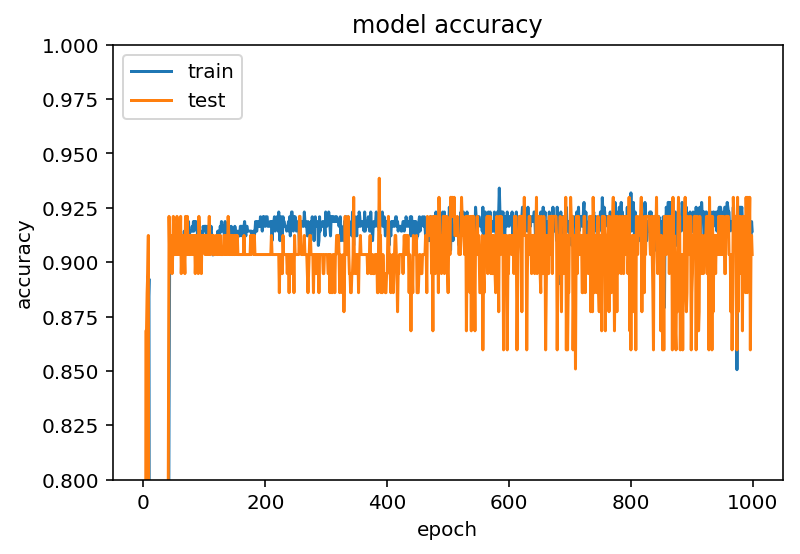

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

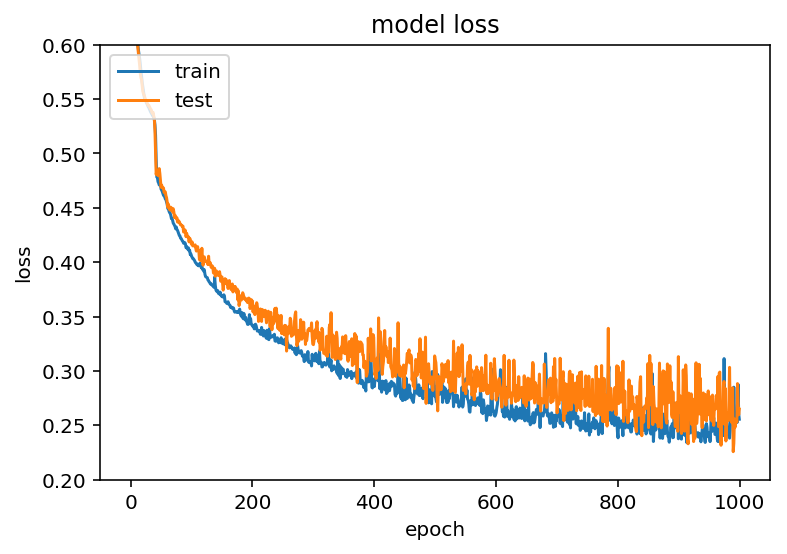

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([.2, .6])
plt.show()

In [52]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

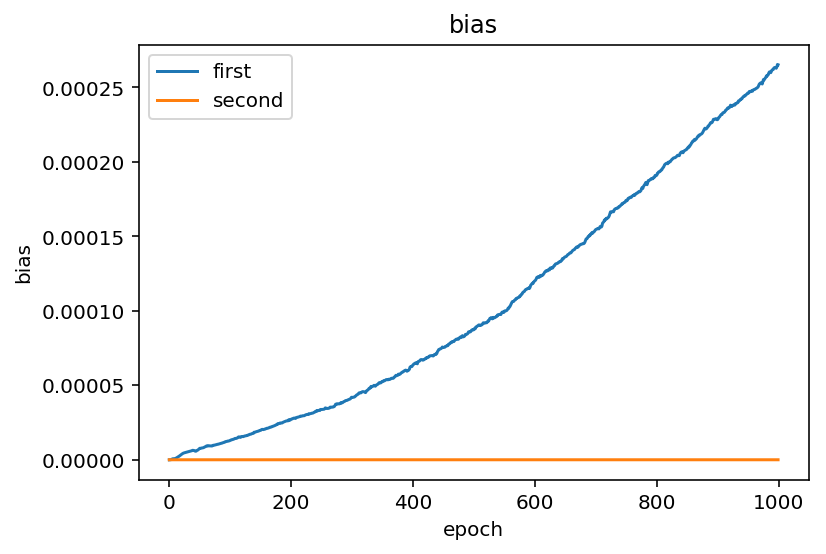

In [62]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
# plt.ylim([-3e-9, 6e-9])
# plt.ylim([, 6e-9])
plt.show()

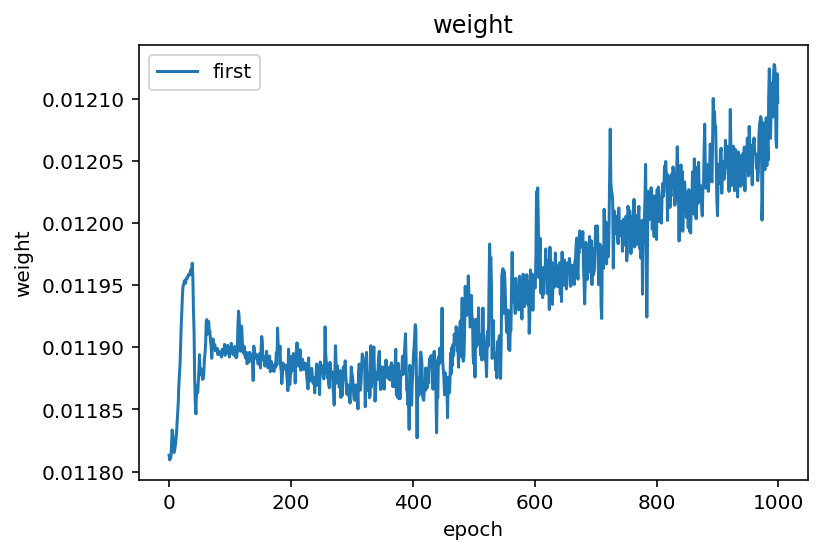

In [54]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

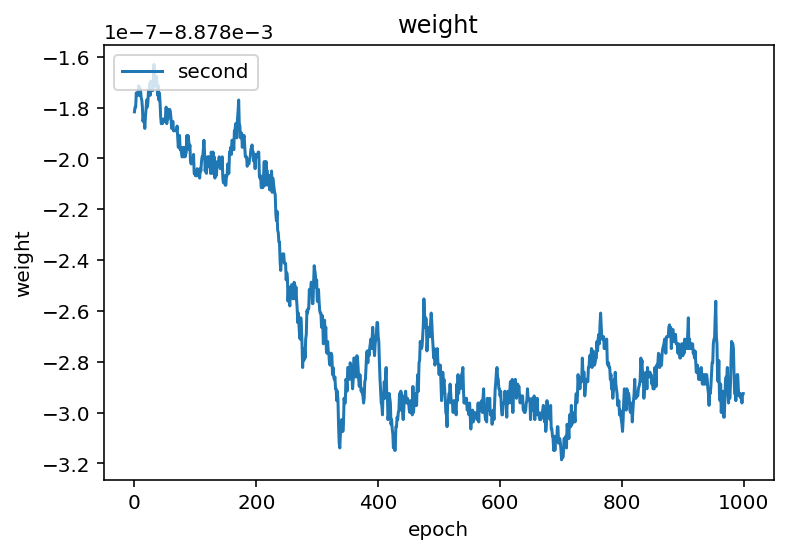

In [55]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

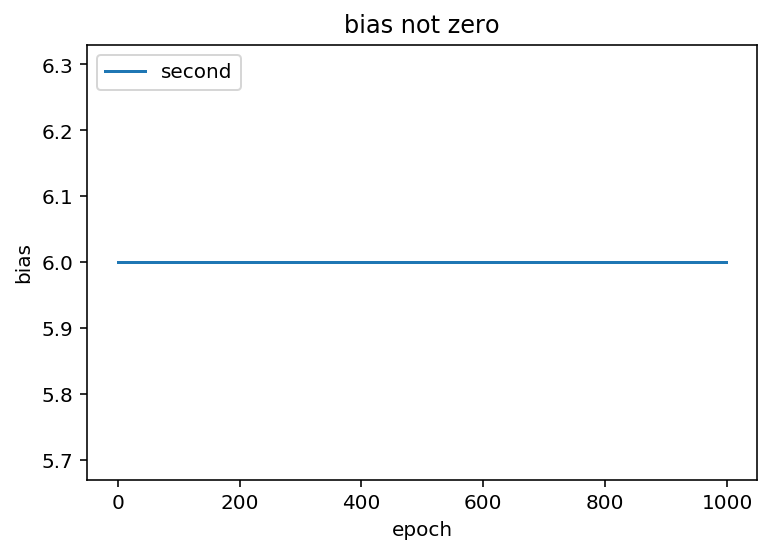

In [56]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

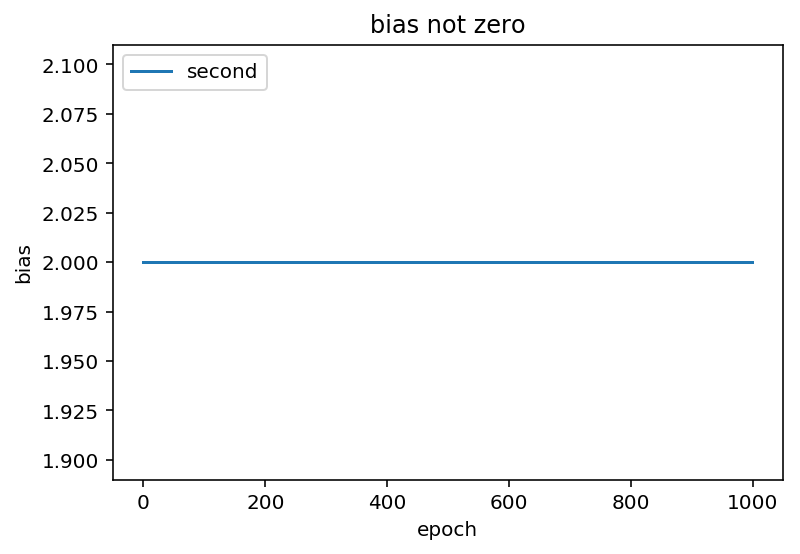

In [57]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

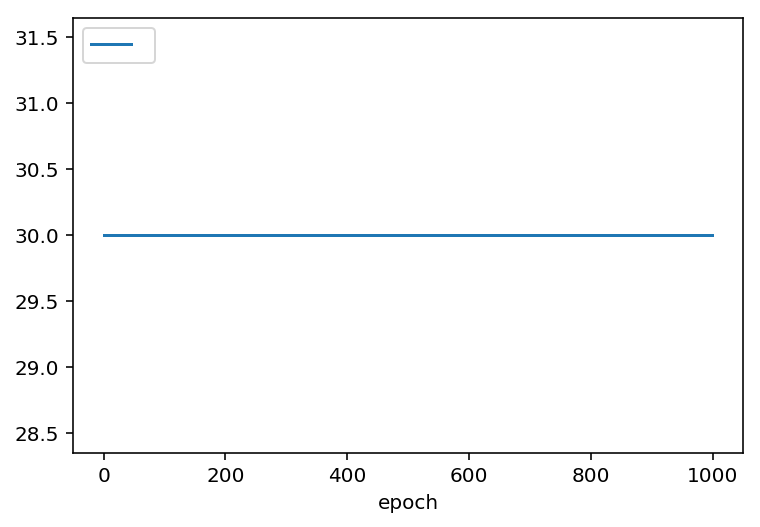

In [58]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

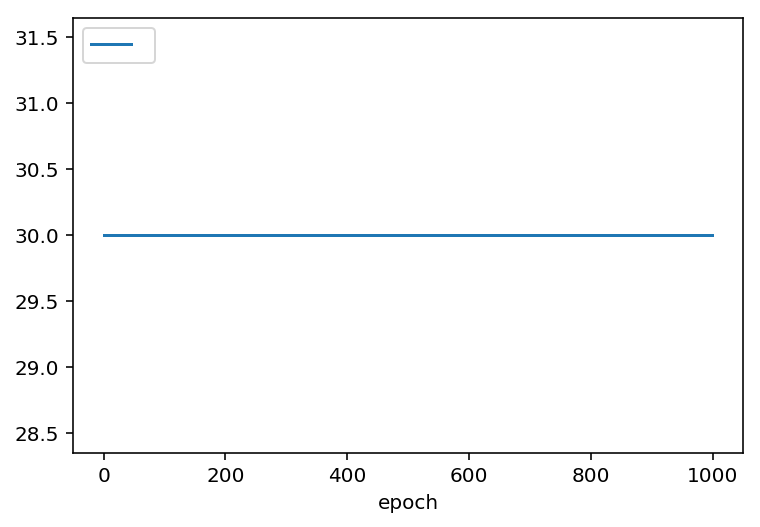

In [59]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

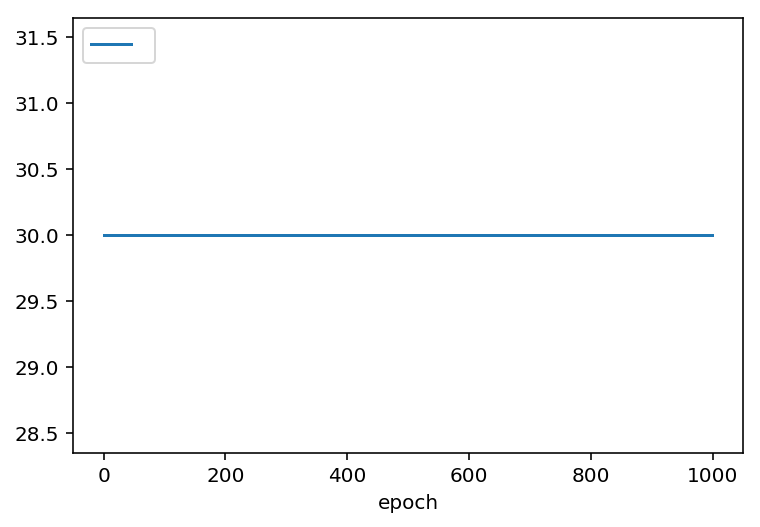

In [60]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

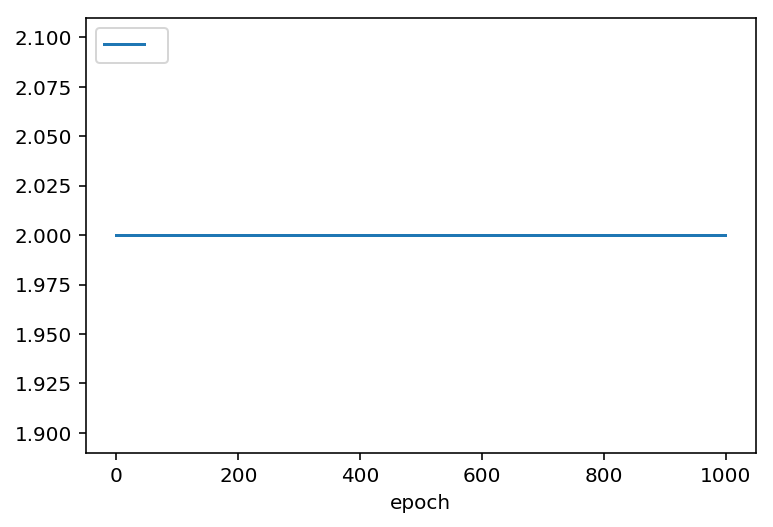

In [61]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()